In [ ]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 42.7 MB/s eta 0:00:00


In [ ]:
!pip install Augmentor

In [136]:
!mkdir original_data

In [137]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import Augmentor

import os

In [138]:
molecules_smiles = [
    'CCBr', 'CCCl', 'CC(C)(C)CC(C)C',
    'CBr', 'CC=CCC(C)C', 'CC(C)=CC(C)C',
    'CCBr', 'CC#CCC(C)C', 'CC(C)CC#CC',
    'CCl', 'CCC(=O)OC', 'CC(=O)N', 'CCC(=O)N(C)C', 'CC(=O)C(C)C', 'CC(Cl)Cl',
    'O=S(=O)(O)O', 'O=[Ti](O)O', 'OS(=O)(=O)O', 'OP(=O)(O)O', 'OP(=O)(O)S', 'O=[Si](O)(O)O',
    'CC(C)(C)O', 'CC(C)(C)OC(C)C', 'CC(C)(C)OCC(C)C',
    'c1ccccc1C(=O)O', 'c1ccccc1N=C=S', 'c1ccc(cc1)C=O', 'c1ccccc1OC(C)C', 'c1ccccc1OCCN', 'c1ccc(cc1)C(C)(C)C',
    'C(=O)O', 'CC(=O)O', 'O=C(O)C=C', 'O=Cl(=O)(=O)O', 'O=[As](O)O', 'I(Cl)Cl',
    'CI', 'CCI', 'CI(=O)=O',
    'CC(=O)CC(C)C', 'CC(Cl)(Cl)Cl', 'C(=O)CC(C)C',
    'C(Br)(Br)Br', 'C(=O)N(C)C', 'CC(=O)OC(C)C',
    'CC(C)N', 'CC(C)NC(C)C', 'CC(C)N(C)C',
    'CC(=O)N(C)C', 'CCC(=O)N(C)C'
]

opts = Draw.MolDrawOptions()
opts.bondLineWidth = 10
opts.fontBold = True
opts.minFontSize = 30
opts.fontScale = 5

for i, smiles in enumerate(molecules_smiles):
    mol = Chem.MolFromSmiles(smiles)

    # Check if the molecule is valid
    if mol is None:
        print(f"Invalid SMILES for molecule {i + 1}: {smiles}")
        continue

    img = Draw.MolToImage(mol, size = (128, 128), kekulize=False, wedgeBonds=False, options=opts)

    img_path = f'original_data/molecule_{i + 1}.png'

    img.save(img_path)

In [139]:
files = os.listdir('original_data/')

files = [file for file in files if file.lower().endswith('.png')]

images = []

for png_file in files:
    image_path = os.path.join("original_data/", png_file)
    img = Image.open(image_path)
    images.append(img)

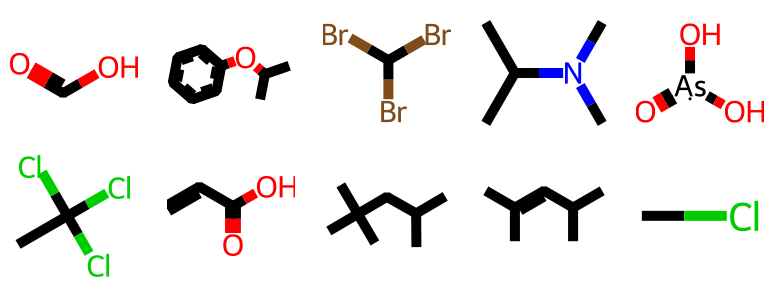

In [140]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (8, 3))

for i in range(10):
    img = images[i]
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [141]:
pipeline = Augmentor.Pipeline('original_data', output_directory = 'augmented_data')

pipeline.rotate(probability = 0.9, max_left_rotation = 10, max_right_rotation = 10)
pipeline.zoom_random(probability = 0.9, percentage_area = 0.95)

pipeline.sample(1050)

Initialised with 50 image(s) found.
Output directory set to original_data/augmented_data.

Processing <PIL.Image.Image image mode=RGB size=128x128 at 0x7CD4CD26F520>: 100%|██████████| 1050/1050 [00:10<00:00, 104.78 Samples/s]


In [142]:
augmented_dir = 'original_data/augmented_data'

files = [file for file in os.listdir(augmented_dir) if file.lower().endswith('.png')]

for png_file in files:
    image_path = os.path.join(augmented_dir, png_file)
    img = Image.open(image_path)
    images.append(img)

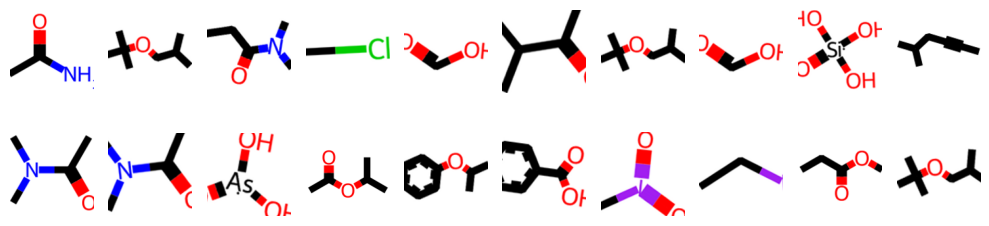

In [143]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, figsize = (10, 3))

for i in range(500, 520):
    pil_image = images[i]
    ax = axes[(i - 500) // 10, (i - 500) % 10]
    ax.imshow(pil_image)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [135]:
!rm -R original_data